## Dataset Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

loading in csv files

In [ ]:
injuries_df = pd.read_csv('C:/Users/lalaf/OneDrive/Brown/Fall2024/Data1030/NFL-Injury-Risk-Analysis/data/InjuryRecord.csv')
plays_df = pd.read_csv('C:/Users/lalaf/OneDrive/Brown/Fall2024/Data1030/NFL-Injury-Risk-Analysis/data/PlayList.csv')

creating one df with "true/false" injury column

In [23]:
# injuries_df.head
# plays_df.head

injury_plays = plays_df.copy()
injury_plays['InjuryStatus'] = [key in list(injuries_df['PlayKey']) for key in injury_plays['PlayKey']]

print(injury_plays.head)

injury_plays.to_csv('Injury_Plays.csv', index=False)

<bound method NDFrame.head of         PlayerKey    GameID      PlayKey RosterPosition  PlayerDay  \
0           26624   26624-1    26624-1-1    Quarterback          1   
1           26624   26624-1    26624-1-2    Quarterback          1   
2           26624   26624-1    26624-1-3    Quarterback          1   
3           26624   26624-1    26624-1-4    Quarterback          1   
4           26624   26624-1    26624-1-5    Quarterback          1   
...           ...       ...          ...            ...        ...   
267000      47888  47888-13  47888-13-51     Cornerback         99   
267001      47888  47888-13  47888-13-52     Cornerback         99   
267002      47888  47888-13  47888-13-53     Cornerback         99   
267003      47888  47888-13  47888-13-54     Cornerback         99   
267004      47888  47888-13  47888-13-55     Cornerback         99   

        PlayerGame StadiumType  FieldType  Temperature         Weather  \
0                1     Outdoor  Synthetic           63 

**Visualization**

        PlayerKey    GameID      PlayKey RosterPosition  PlayerDay  \
7162        31070   31070-1    31070-1-1   Running Back          1   
7163        31070   31070-1    31070-1-2   Running Back          1   
7164        31070   31070-1    31070-1-3   Running Back          1   
7165        31070   31070-1    31070-1-4   Running Back          1   
7166        31070   31070-1    31070-1-5   Running Back          1   
...           ...       ...          ...            ...        ...   
266372      47813  47813-11  47813-11-61     Cornerback        113   
266373      47813  47813-11  47813-11-62     Cornerback        113   
266374      47813  47813-11  47813-11-63     Cornerback        113   
266375      47813  47813-11  47813-11-64     Cornerback        113   
266376      47813  47813-11  47813-11-65     Cornerback        113   

        PlayerGame       StadiumType  FieldType  Temperature Weather PlayType  \
7162             1          Outdoors    Natural           67   Sunny     Punt 

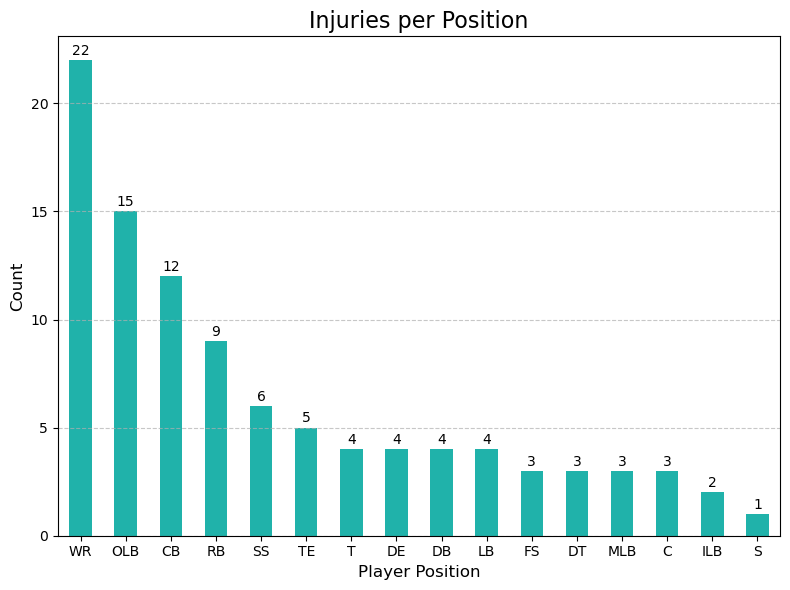

In [17]:
# Get subset dataframe of only injured players' plays
play_data_subset = plays_df[plays_df['PlayerKey'].isin(injuries_df['PlayerKey'])]
print(play_data_subset)

# Eliminate duplicates - not looking for play chronology atm; want position of each injured player
play_data_subset = play_data_subset.drop_duplicates(subset=['PlayerKey'])
print(play_data_subset)

# Get positions of those 100 injured players
pos_counts = play_data_subset['Position'].value_counts()
plt.figure(figsize=(8, 6))
bars = pos_counts.plot(kind='bar', color=['lightseagreen'])
plt.title('Injuries per Position', fontsize=16)
plt.xlabel('Player Position', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add annotations above each bar
for i, count in enumerate(pos_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [30]:
print(injury_plays['Temperature'].describe())



count    267005.000000
mean        -35.029535
std         304.583110
min        -999.000000
25%          44.000000
50%          61.000000
75%          72.000000
max          97.000000
Name: Temperature, dtype: float64


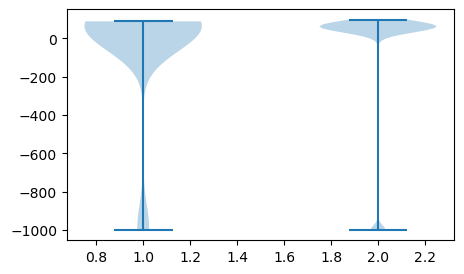

In [29]:
dataset = [injury_plays[injury_plays['InjuryStatus']==True]['Temperature'].values,
           injury_plays[injury_plays['InjuryStatus']==False]['Temperature'].values]

plt.figure(figsize=(5,3))

plt.violinplot(dataset=dataset)
plt.show()